In [ ]:
#!pip install tensorflow==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 94.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflo

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [ ]:
!python --version

Python 3.9.16


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [ ]:
!pip show keras

Name: keras
Version: 2.10.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.9/dist-packages
Requires: 
Required-by: keras-vis, tensorflow


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/train'
valid_path = '/content/drive/MyDrive/Dataset/test'

In [ ]:
# Import the Inception V3 library as shown below and add preprocessing layer to the front of Inception V3
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/train/*')

In [ ]:
folders

['/content/drive/MyDrive/Dataset/train/COVID19',
 '/content/drive/MyDrive/Dataset/train/PNEUMONIA',
 '/content/drive/MyDrive/Dataset/train/NORMAL',
 '/content/drive/MyDrive/Dataset/train/TURBERCULOSIS']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 12758 images belonging to 4 classes.


In [ ]:
training_set.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'TURBERCULOSIS': 3}

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 3026 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-25-04ffb29a66a7>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
798/798 [==============================] - 2066s 3s/step - loss: 2.0903 - accuracy: 0.8533 - val_loss: 3.8669 - val_accuracy: 0.7938
Epoch 2/10
798/798 [==============================] - 2052s 3s/step - loss: 1.4912 - accuracy: 0.9092 - val_loss: 2.5559 - val_accuracy: 0.8734
Epoch 3/10
798/798 [==============================] - 2041s 3s/step - loss: 1.5135 - accuracy: 0.9170 - val_loss: 2.5580 - val_accuracy: 0.8777
Epoch 4/10
798/798 [==============================] - 2054s 3s/step - loss: 1.3598 - accuracy: 0.9288 - val_loss: 3.3001 - val_accuracy: 0.8539
Epoch 5/10
798/798 [==============================] - 2046s 3s/step - loss: 1.5228 - accuracy: 0.9255 - val_loss: 2.8248 - val_accuracy: 0.8942
Epoch 6/10
798/798 [==============================] - 2045s 3s/step - loss: 1.7079 - accuracy: 0.9280 - val_loss: 5.5663 - val_accuracy: 0.8308
Epoch 7/10
798/798 [==============================] - 2049s 3s/step - loss: 1.5326 - accuracy: 0.9385 - val_loss: 4.0581 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt

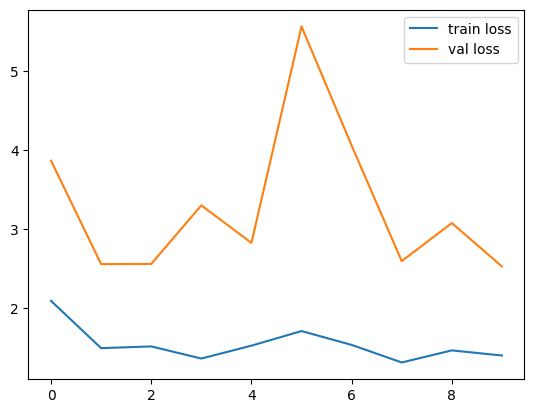

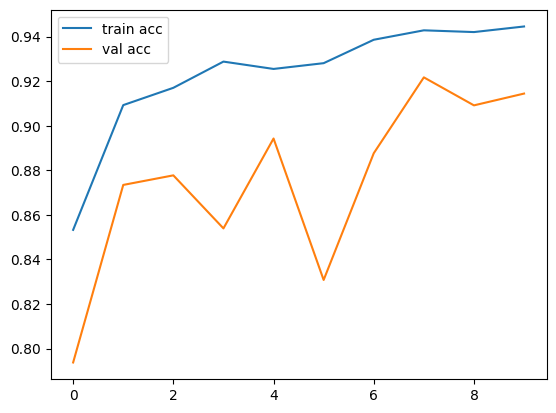

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
 #save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
model.evaluate(test_set)

190/190 [==============================] - 361s 2s/step - loss: 2.5266 - accuracy: 0.9144


[2.5265696048736572, 0.9144084453582764]

In [ ]:
from tensorflow.keras.models import  save_model, load_model

In [ ]:
 #Save the model
#filepath = '/content/drive/MyDrive/Models'
#save_model(model_inception, filepath)

In [ ]:
 #Load the model
#model = load_model(filepath, compile = True)

In [ ]:
y_pred = model.predict(test_set)

190/190 [==============================] - 365s 2s/step


In [ ]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 1.4466961e-36, 9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01, 0.0000000e+00],
       [5.8592416e-29, 9.9948418e-01, 1.8608287e-27, 5.1573390e-04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([3, 2, 0, ..., 2, 1, 3])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_inception.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Dataset/test/TURBERCULOSIS/Tuberculosis-90.png',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[197., 197., 197.],
        [215., 215., 215.],
        [209., 209., 209.],
        ...,
        [206., 206., 206.],
        [207., 207., 207.],
        [205., 205., 205.]],

       [[201., 201., 201.],
        [215., 215., 215.],
        [209., 209., 209.],
        ...,
        [151., 151., 151.],
        [151., 151., 151.],
        [178., 178., 178.]],

       [[200., 200., 200.],
        [214., 214., 214.],
        [209., 209., 209.],
        ...,
        [ 76.,  76.,  76.],
        [ 74.,  74.,  74.],
        [105., 105., 105.]],

       ...,

       [[201., 201., 201.],
        [216., 216., 216.],
        [211., 211., 211.],
        ...,
        [ 82.,  82.,  82.],
        [111., 111., 111.],
        [194., 194., 194.]],

       [[201., 201., 201.],
        [217., 217., 217.],
        [211., 211., 211.],
        ...,
        [176., 176., 176.],
        [213., 213., 213.],
        [223., 223., 223.]],

       [[202., 202., 202.],
        [217., 217., 217.],
        [210., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[4.3436166e-09, 4.9511790e-09, 4.9524850e-08, 1.0000000e+00]],
      dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 145ms/step


In [ ]:
a==3

array([ True])